In [19]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Read data
data = pd.read_csv('../../data/raw/tblclasses.csv', usecols=['CLASSDATESTART', 'LOCATIONID', 'CLASSID', 'STUDIOID', 'CLASSTRAINERID', 'CLASSCAPACITY', 'WAITLISTSIZE', 'DAYSUNDAY', 'DAYMONDAY', 'DAYTUESDAY', 'DAYWEDNESDAY', 'DAYTHURSDAY', 'DAYFRIDAY', 'DAYSATURDAY'])

# Rename the selected columns
data.rename(
    columns = {
        'CLASSDATESTART': 'date',
        'LOCATIONID': 'location',
        'CLASSID': 'classid',
        'STUDIOID': 'studio',
        'CLASSTRAINERID': 'coach',
        'DAYSUNDAY': 'sunday',
        'DAYMONDAY': 'monday',
        'DAYTUESDAY': 'tuesday',
        'DAYWEDNESDAY': 'wednesday',
        'DAYTHURSDAY': 'thursday',
        'DAYFRIDAY': 'friday',
        'DAYSATURDAY': 'saturday',
        'CLASSCAPACITY': 'capacity',
        'WAITLISTSIZE': 'waitlist',
    },
    inplace = True
)

# Aggregate days in single column
data['day'] = None
days_of_week = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
for day in days_of_week:
    data.loc[data[day], 'day'] = day
data.drop(columns=days_of_week, inplace=True)

# Add class names
classname_tbl = pd.read_csv('../../data/interim/classname.csv')
data = data.merge(classname_tbl, on='classid', how='left')
data.rename(
    columns = {
        'classname': 'program',
    },
    inplace = True
)

# Date as date
data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

# Create demand column
data['demand'] = data['capacity'] + data['waitlist']
data.drop(columns=['capacity', 'waitlist'], inplace=True)

# Move capacity to be the rightmost columns
data = data[['date', 'studio', 'location', 'program', 'coach',  'day', 'demand']]

# Print
print(data.head())

         date  studio  location   program      coach     day  demand
0  2023-09-01   44717         4  fullbody  100000962  friday      23
1  2023-09-03   44717         4  fullbody  100000132  sunday      23
2  2023-09-03   44717         4  fullbody  100000132  sunday      23
3  2023-09-01   44717        19  fullbody  100000925  friday      21
4  2023-09-03   44717         4   armsabs  100000665  sunday      23


Mean Demand: 19.337867807310403
Standard Deviation of Demand: 6.404633962999632
Max Demand: 801


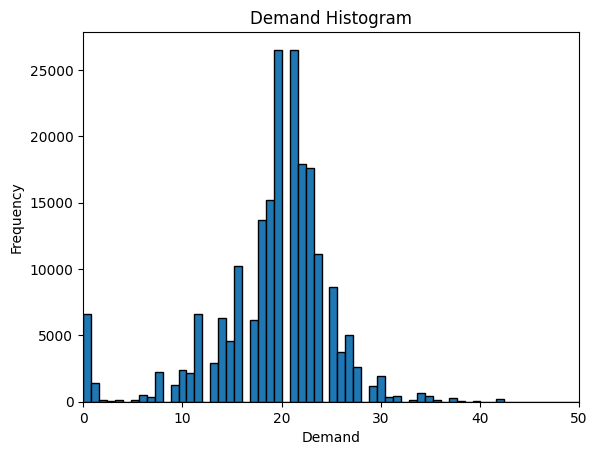

In [31]:
mean_demand = data['demand'].mean()
std_demand = data['demand'].std()
max_demand = data['demand'].max()

print(f"Mean Demand: {mean_demand}")
print(f"Standard Deviation of Demand: {std_demand}")
print(f"Max Demand: {max_demand}")

plt.hist(data['demand'], bins=1000, edgecolor='k')
plt.title('Demand Histogram')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

             date  studio  location program  coach       day  demand
61590  2018-11-08   44717         1     NaN      3  thursday     801


In [3]:
# Explore data
print('Number of rows:', data.shape[0])
print('Unique studios:', len(data['studio'].unique()))
print('Unique programs:', len(data['program'].unique()))
print('Unique coaches:', len(data['coach'].unique()))
print('Unique locations:', len(data['location'].unique()))
print('Unique days:', len(data['day'].unique()))

Number of rows: 208771
Unique studios: 30
Unique programs: 3884
Unique coaches: 981
Unique locations: 22
Unique days: 7


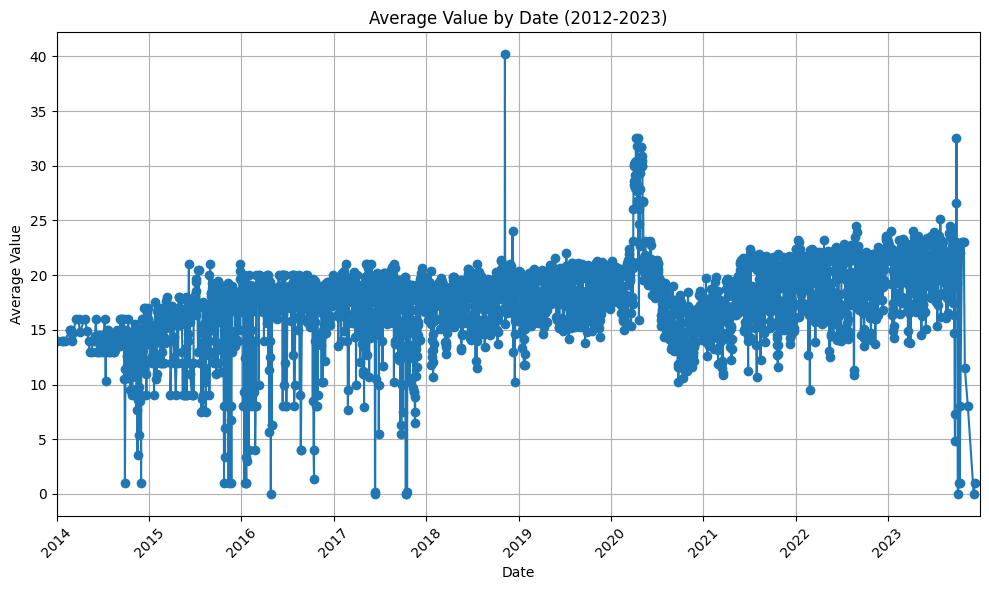

In [39]:
# Attempt to plot timeseries
data['date'] = pd.to_datetime(data['date'])

# Group by the 'date' column and calculate the average of 'value'
result = data.groupby('date')['demand'].mean().reset_index()

# Filter data to include only dates from 2012 to 2023
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2023-12-31')
result = result[(result['date'] >= start_date) & (result['date'] <= end_date)]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(result['date'], result['demand'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.title('Average Value by Date (2012-2023)')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(start_date, end_date)  # Set the x-axis limits
plt.tight_layout()

# Show the plot
plt.show()